---
execute:
  cache: false
  eval: true
  echo: true
  warning: false
---


# Handling Noise {#sec-noise}

This chapter demonstrates how noisy functions can be handled by `Spot` and how noise can be simulated, i.e., added to the objective function.

## Example: `Spot` and the Noisy Sphere Function


In [1]:
import numpy as np
from math import inf
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
import matplotlib.pyplot as plt
from spotpython.utils.init import fun_control_init, get_spot_tensorboard_path
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

PREFIX = "08"

Seed set to 123


### The Objective Function: Noisy Sphere

The `spotpython` package provides several classes of objective functions, which return a one-dimensional output $y=f(x)$ for a given input $x$ (independent variable). Several objective functions allow one- or multidimensional input, some also combinations of real-valued and categorial input values.

An objective function is considered as "analytical" if it can be described by a closed mathematical formula, e.g.,
$$
f(x, y) = x^2 + y^2.
$$

To simulate measurement errors, adding artificial noise to the function value $y$ is a common practice, e.g.,:

$$
f(x, y) = x^2 + y^2 + \epsilon.
$$

Usually, noise is assumed to be normally distributed with mean $\mu=0$ and standard deviation $\sigma$.
spotpython uses numpy's `scale` parameter, which specifies the standard deviation (spread or "width") of the distribution is used. This must be a non-negative value, see [https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

:::{.callout-note}
### Example: The sphere function without noise

The default setting does not use any noise.


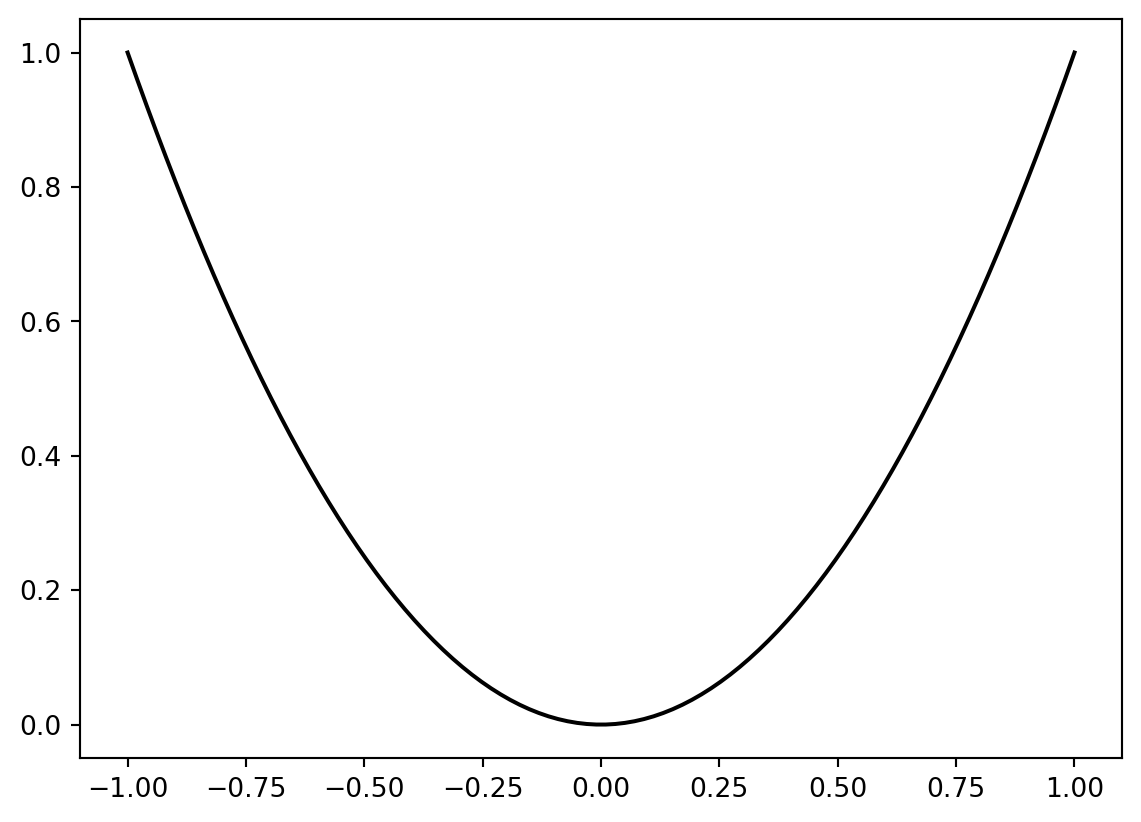

In [2]:
from spotpython.fun.objectivefunctions import analytical
fun = analytical().fun_sphere
x = np.linspace(-1,1,100).reshape(-1,1)
y = fun(x)
plt.figure()
plt.plot(x,y, "k")
plt.show()

:::


:::{.callout-note}
### Example: The sphere function with noise

Noise can be added to the sphere function as follows:


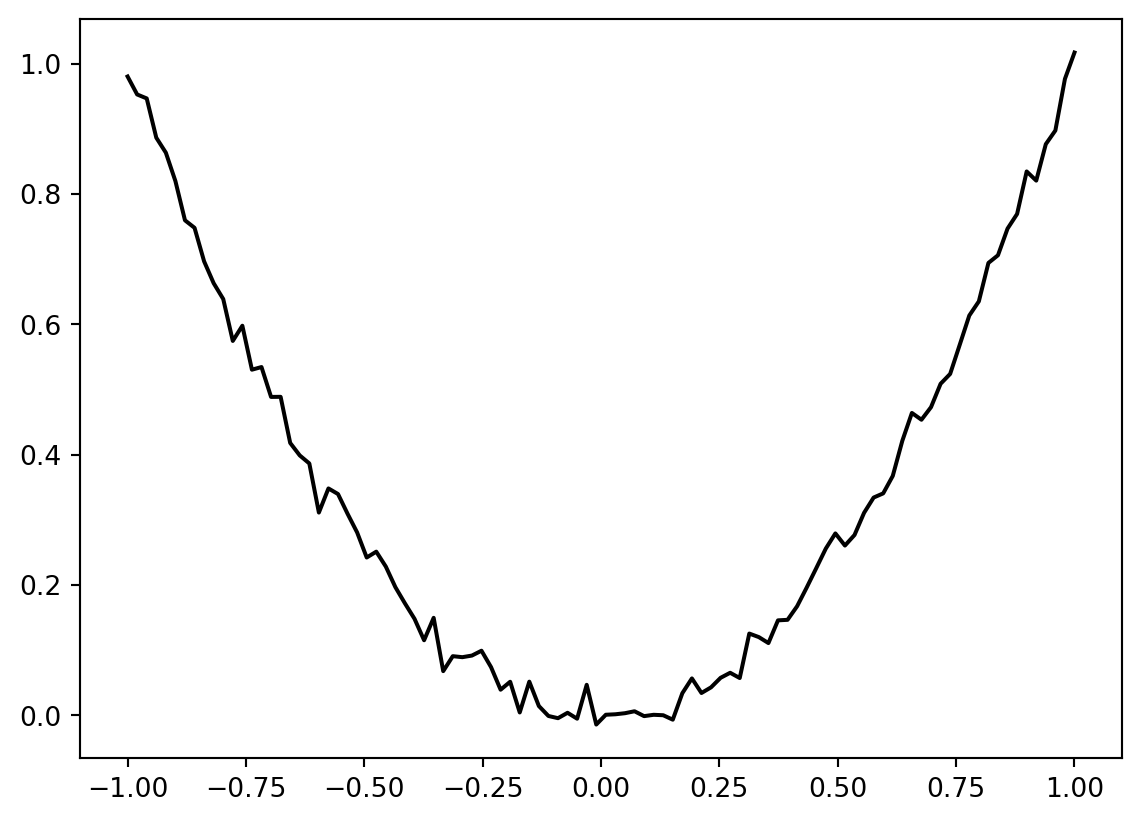

In [3]:
from spotpython.fun.objectivefunctions import analytical
fun = analytical(seed=123, sigma=0.02).fun_sphere
x = np.linspace(-1,1,100).reshape(-1,1)
y = fun(x)
plt.figure()
plt.plot(x,y, "k")
plt.show()

:::

### Reproducibility: Noise Generation and Seed Handling

spotpython provides two mechanisms for generating random noise:

1. The seed is initialized once, i.e., when the objective function is instantiated. This can be done using the following call: `fun = analytical(sigma=0.02, seed=123).fun_sphere`.
2. The seed is set every time the objective function is called. This can be done using the following call: `y = fun(x, sigma=0.02, seed=123)`.

These two different ways lead to different results as explained in the following tables:



:::{.callout-note}
### Example: Noise added to the sphere function

Since `sigma` is set to `0.02`, noise is added to the function:


In [4]:
from spotpython.fun.objectivefunctions import analytical
fun = analytical(sigma=0.02, seed=123).fun_sphere
x = np.array([1]).reshape(-1,1)
for i in range(3):
    print(f"{i}: {fun(x)}")

0: [0.98021757]
1: [0.99264427]
2: [1.02575851]


The seed is set once. Every call to `fun()` results in a different value.
The whole experiment can be repeated, the initial seed is used to generate the same sequence as shown below:

:::

:::{.callout-note}
### Example: Noise added to the sphere function

Since `sigma` is set to `0.02`, noise is added to the function:


In [5]:
from spotpython.fun.objectivefunctions import analytical
fun = analytical(sigma=0.02, seed=123).fun_sphere
x = np.array([1]).reshape(-1,1)
for i in range(3):
    print(f"{i}: {fun(x)}")

0: [0.98021757]
1: [0.99264427]
2: [1.02575851]


:::

If `spotpython` is used as a hyperparameter tuner, it is important that only one realization of the noise function is optimized.
This behaviour can be accomplished by passing the same seed via the dictionary `fun_control` to every call of the objective function `fun` as shown below:

:::{.callout-note}
### Example: The same noise added to the sphere function

Since `sigma` is set to `0.02`, noise is added to the function:


In [6]:
from spotpython.fun.objectivefunctions import analytical
fun = analytical().fun_sphere
fun_control = fun_control_init(
    PREFIX=PREFIX,
    sigma=0.02)
y = fun(x, fun_control=fun_control)
x = np.array([1]).reshape(-1,1)
for i in range(3):
    print(f"{i}: {fun(x)}")

Seed set to 123


0: [0.98021757]
1: [0.98021757]
2: [0.98021757]


:::


## spotpython's Noise Handling Approaches

The following setting will be used for the next steps:


In [7]:
fun = analytical().fun_sphere
fun_control = fun_control_init(
    PREFIX=PREFIX,
    sigma=0.02,
)

Seed set to 123


`spotpython` is adopted as follows to cope with noisy functions:

1. `fun_repeats` is set to a value larger than 1 (here: 2)
2. `noise` is set to `true`. Therefore, a nugget (`Lambda`) term is added to the correlation matrix
3.  `init size` (of the `design_control` dictionary) is set to a value larger than 1 (here: 3)


In [8]:
spot_1_noisy = spot.Spot(fun=fun,
                   fun_control=fun_control_init(
                                    lower = np.array([-1]),
                                    upper = np.array([1]),
                                    fun_evals = 20,
                                    fun_repeats = 2,
                                    noise = True,
                                    show_models=True),
                   design_control=design_control_init(init_size=3, repeats=2),
                   surrogate_control=surrogate_control_init(noise=True))

Seed set to 123


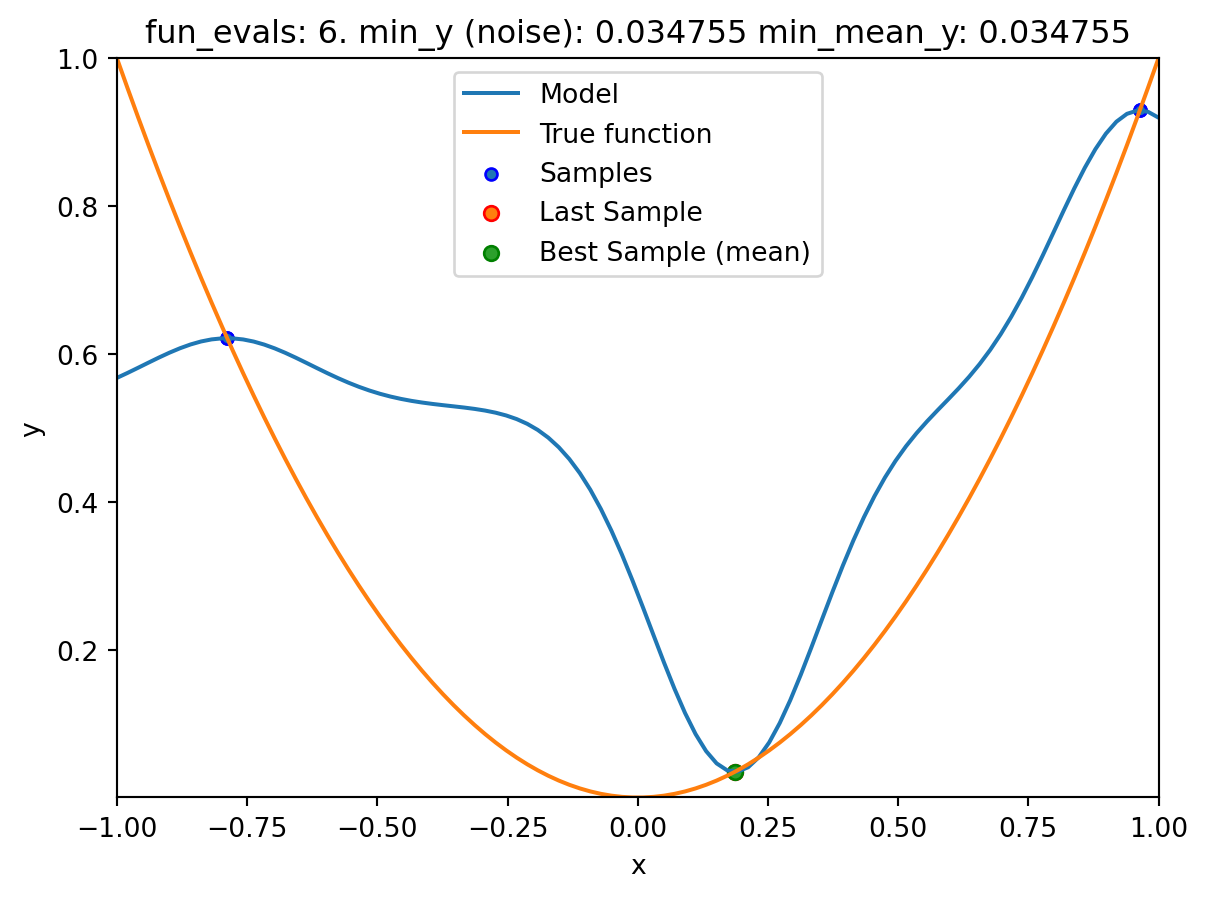

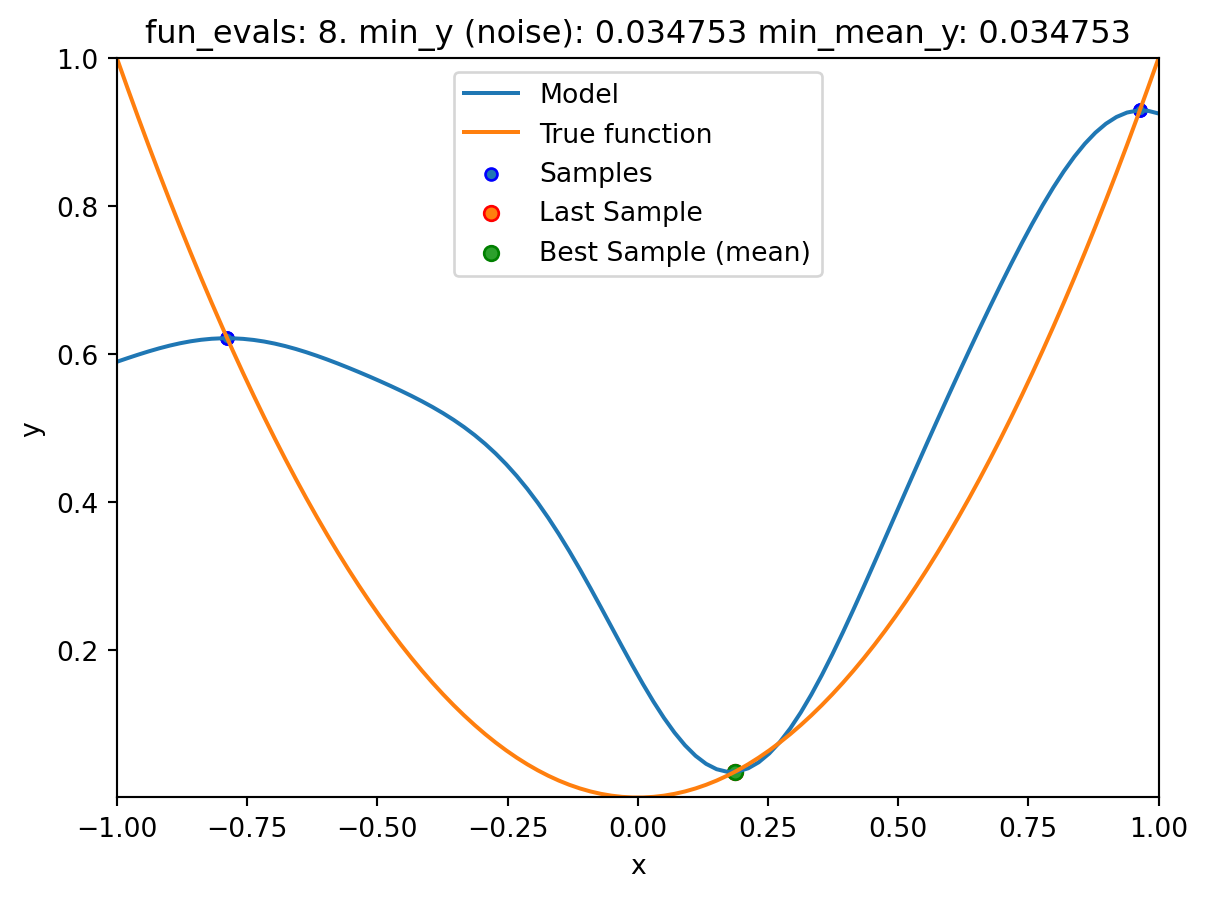

spotpython tuning: 0.034752873669989026 [####------] 40.00% 


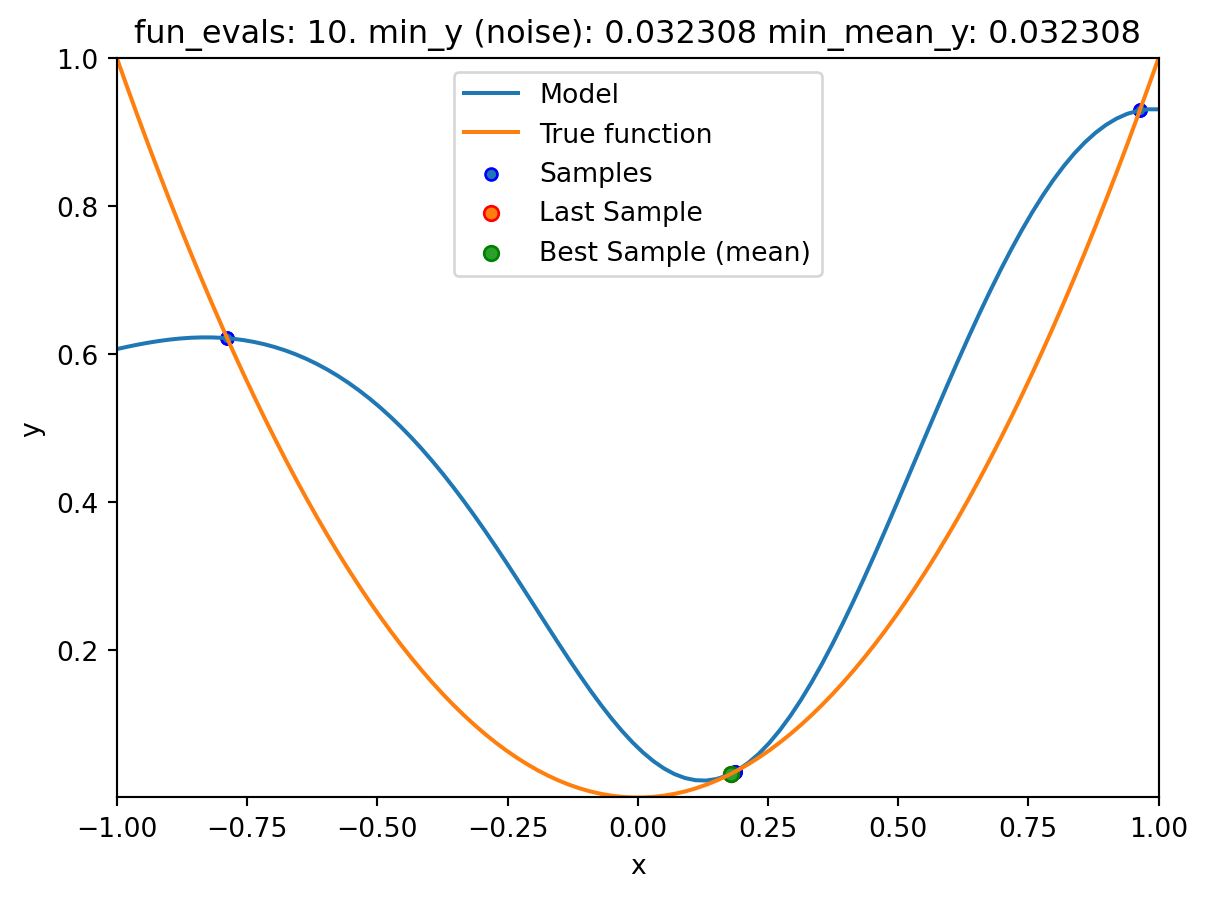

spotpython tuning: 0.03230817945928789 [#####-----] 50.00% 


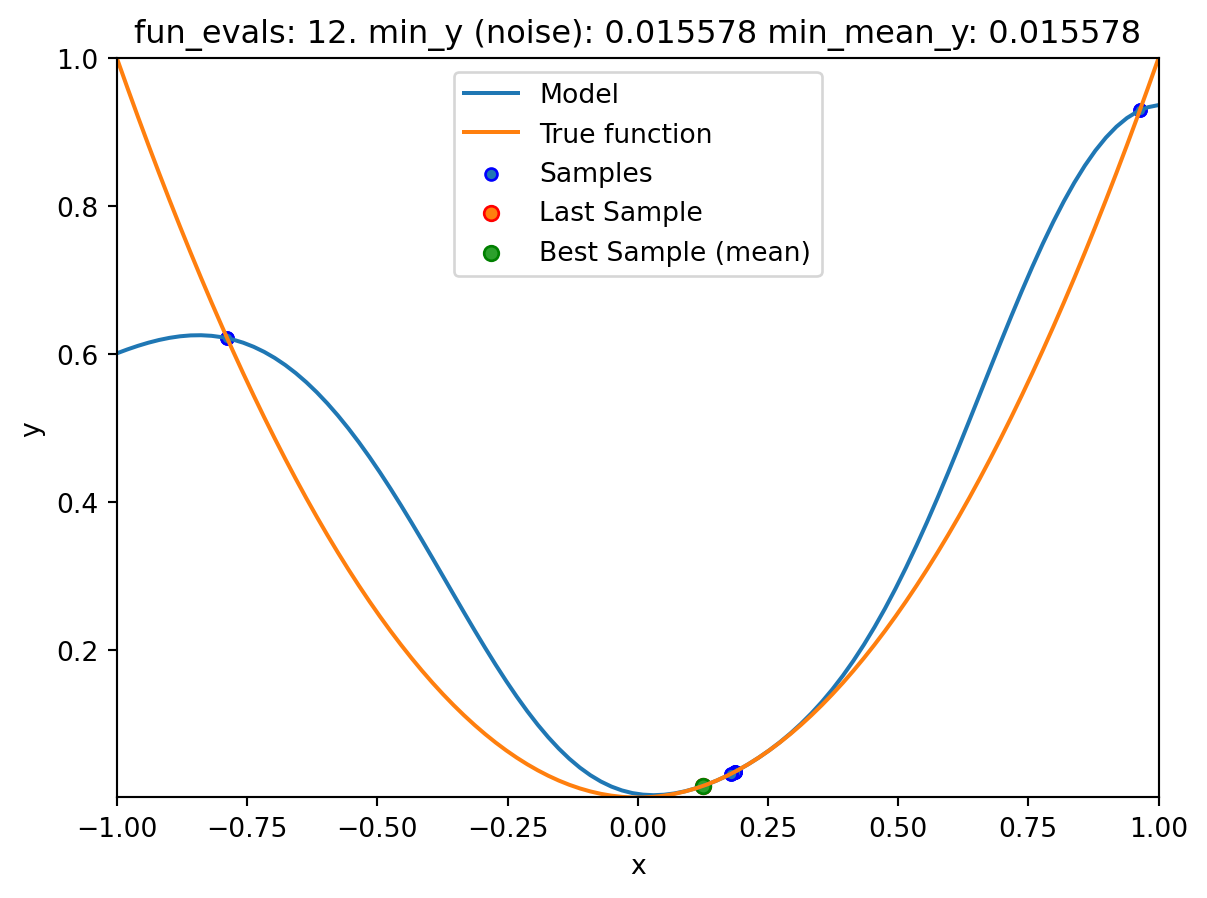

spotpython tuning: 0.015578418800855254 [######----] 60.00% 


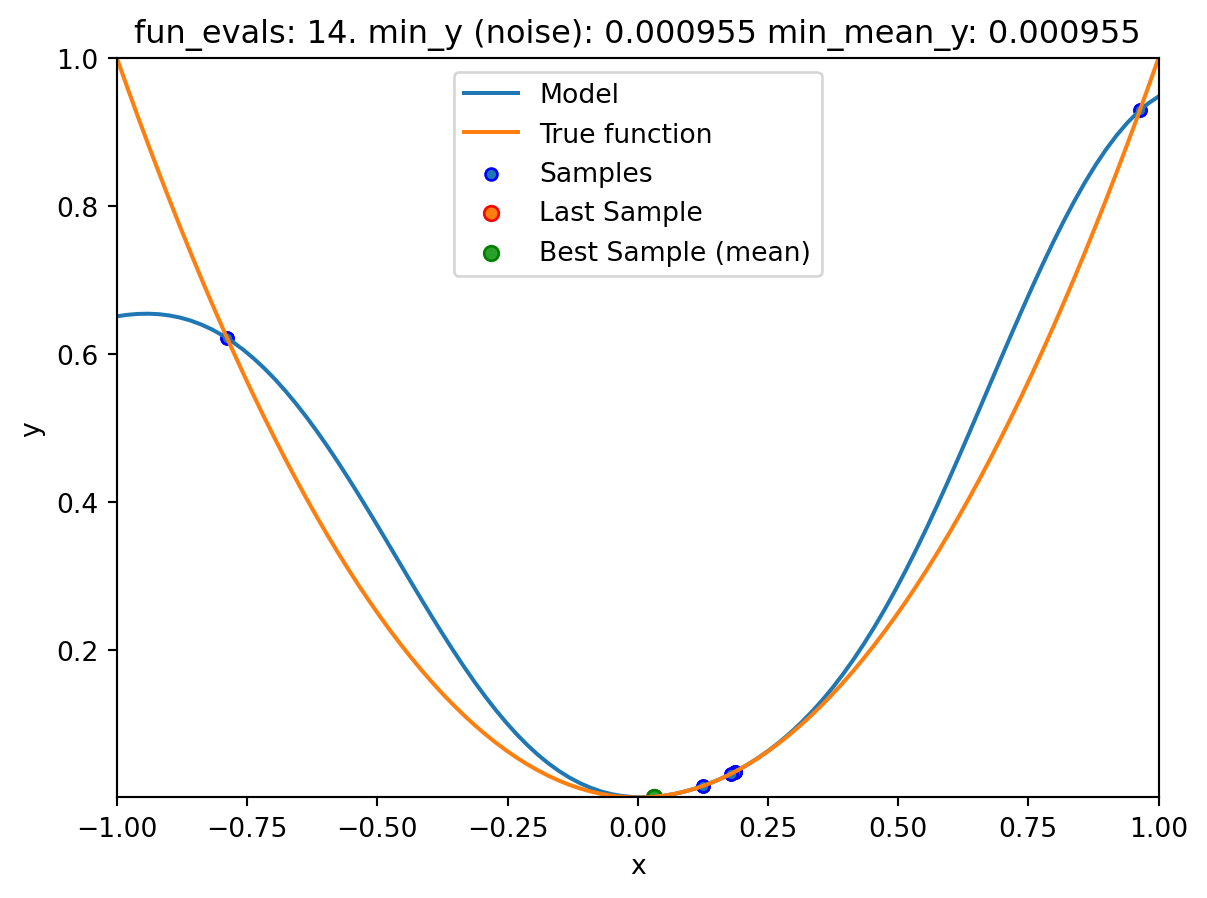

spotpython tuning: 0.0009550994714026289 [#######---] 70.00% 


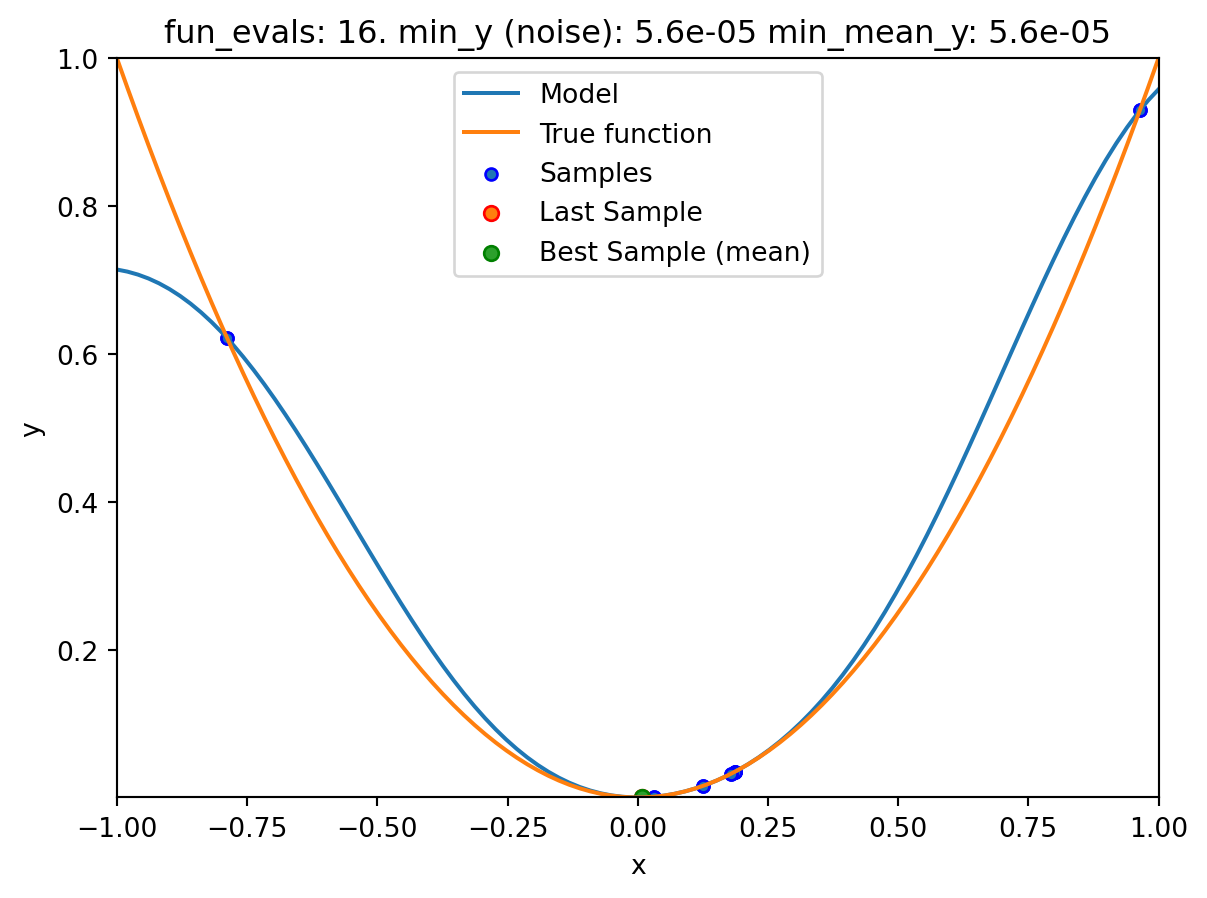

spotpython tuning: 5.561590542963861e-05 [########--] 80.00% 


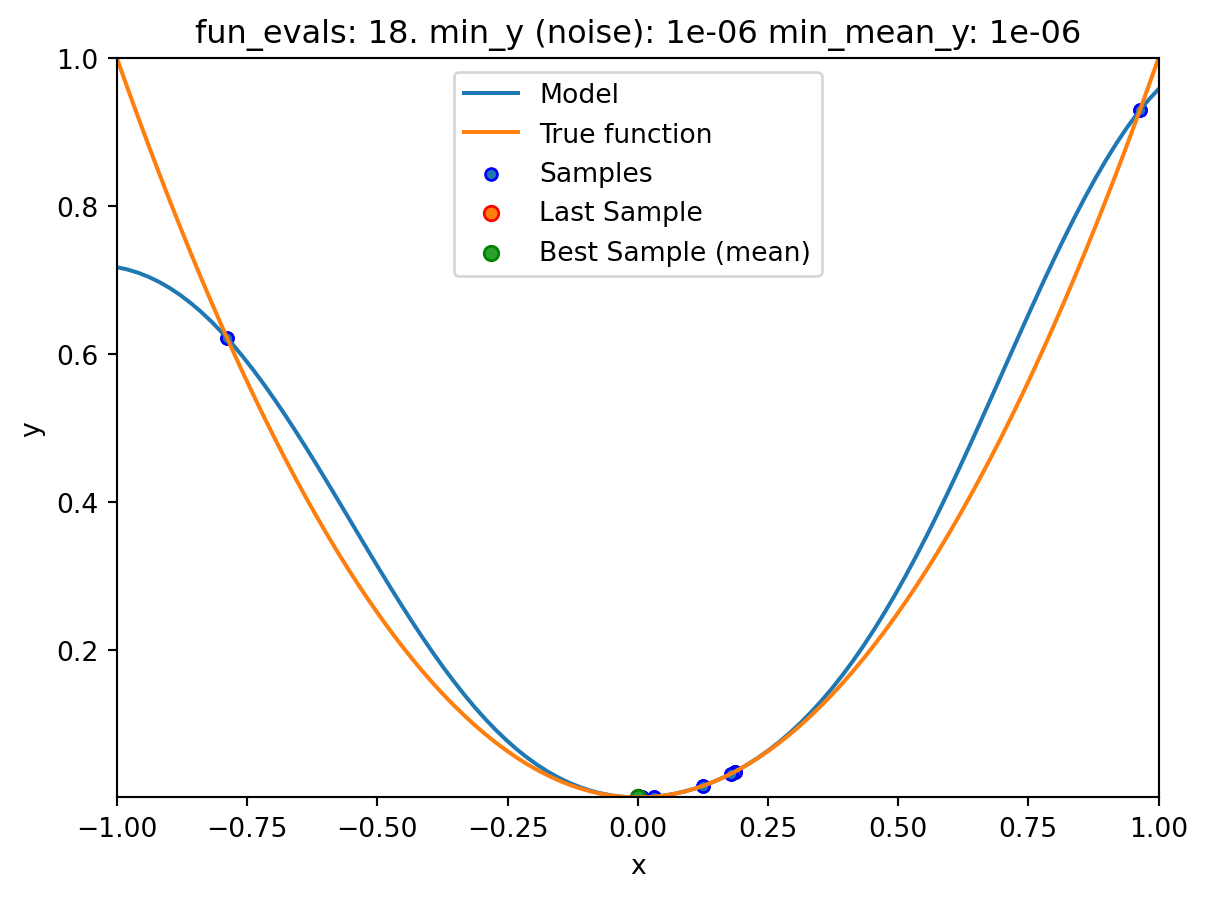

spotpython tuning: 7.181090066713707e-07 [#########-] 90.00% 


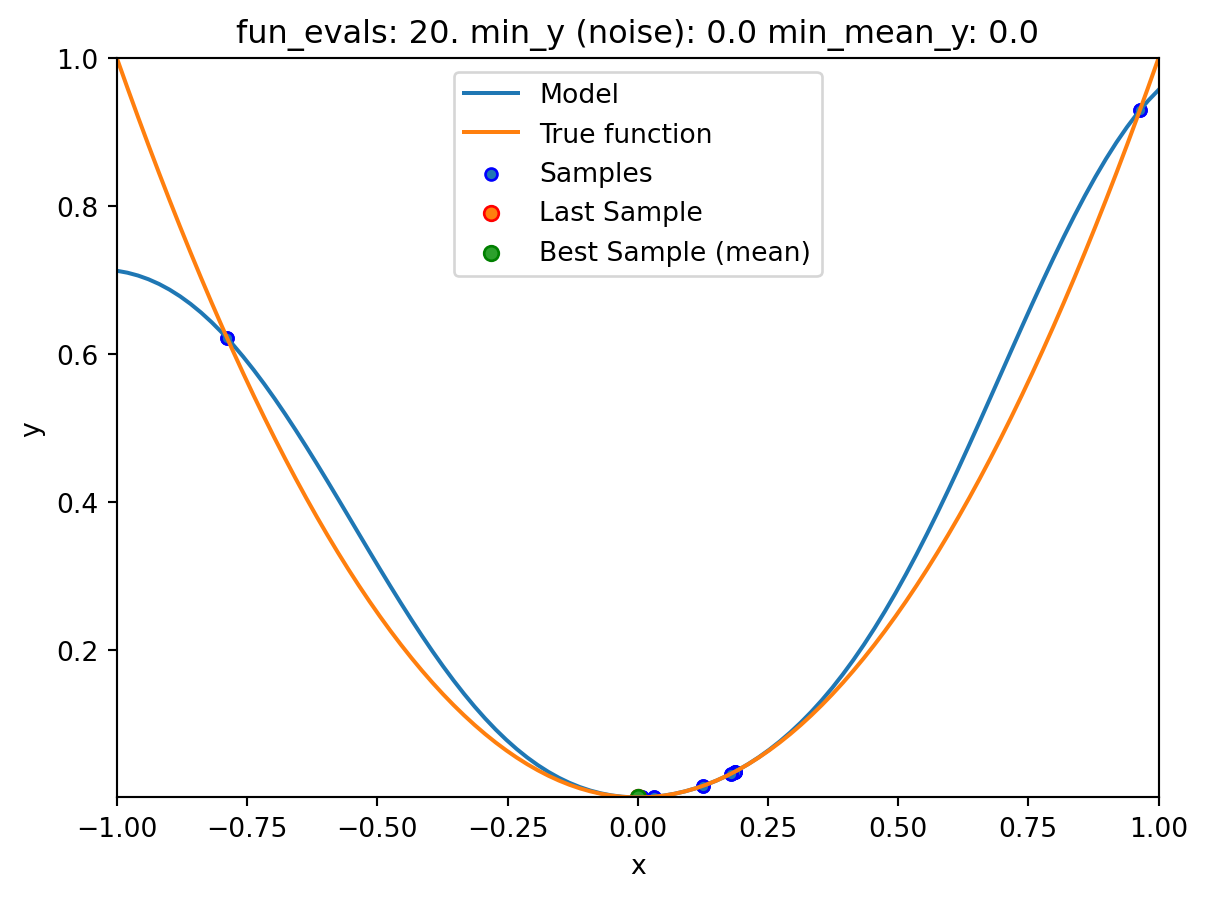

spotpython tuning: 4.5254143126895086e-07 [##########] 100.00% Done...



In [9]:
spot_1_noisy.run()

## Print the Results


In [10]:
spot_1_noisy.print_results()

min y: 4.5254143126895086e-07
min mean y: 4.5254143126895086e-07
x0: 0.0006727119972684825


[['x0', 0.0006727119972684825]]

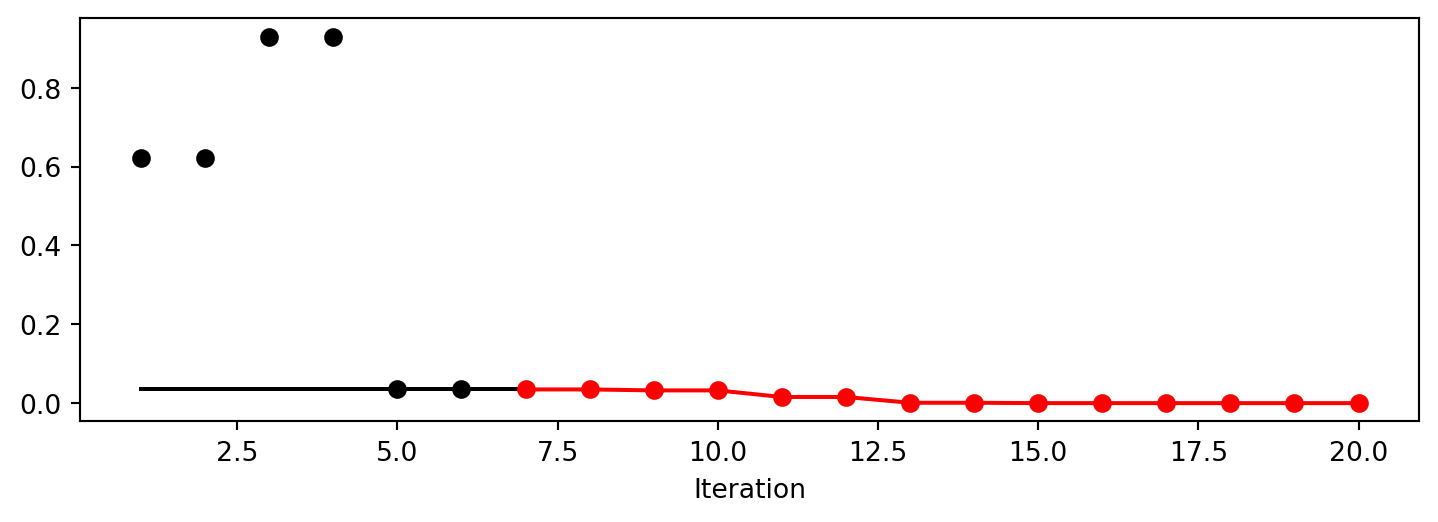

In [11]:
#| fig-cap: Progress plot. *Black* dots denote results from the initial design. *Red* dots  illustrate the improvement found by the surrogate model based optimization.
spot_1_noisy.plot_progress(log_y=False,
    filename="./figures/" + PREFIX + "_progress.png")

##  Noise and Surrogates: The Nugget Effect

### The Noisy Sphere

#### The Data

* We prepare some data first:


In [12]:
import numpy as np
import spotpython
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from spotpython.design.spacefilling import SpaceFilling
from spotpython.build.kriging import Kriging
import matplotlib.pyplot as plt

gen = SpaceFilling(1)
rng = np.random.RandomState(1)
lower = np.array([-10])
upper = np.array([10])
fun = analytical().fun_sphere
fun_control = fun_control_init(
    PREFIX=PREFIX,
    sigma=4)
X = gen.scipy_lhd(10, lower=lower, upper = upper)
y = fun(X, fun_control=fun_control)
X_train = X.reshape(-1,1)
y_train = y

Seed set to 123


* A surrogate without nugget is fitted to these data:


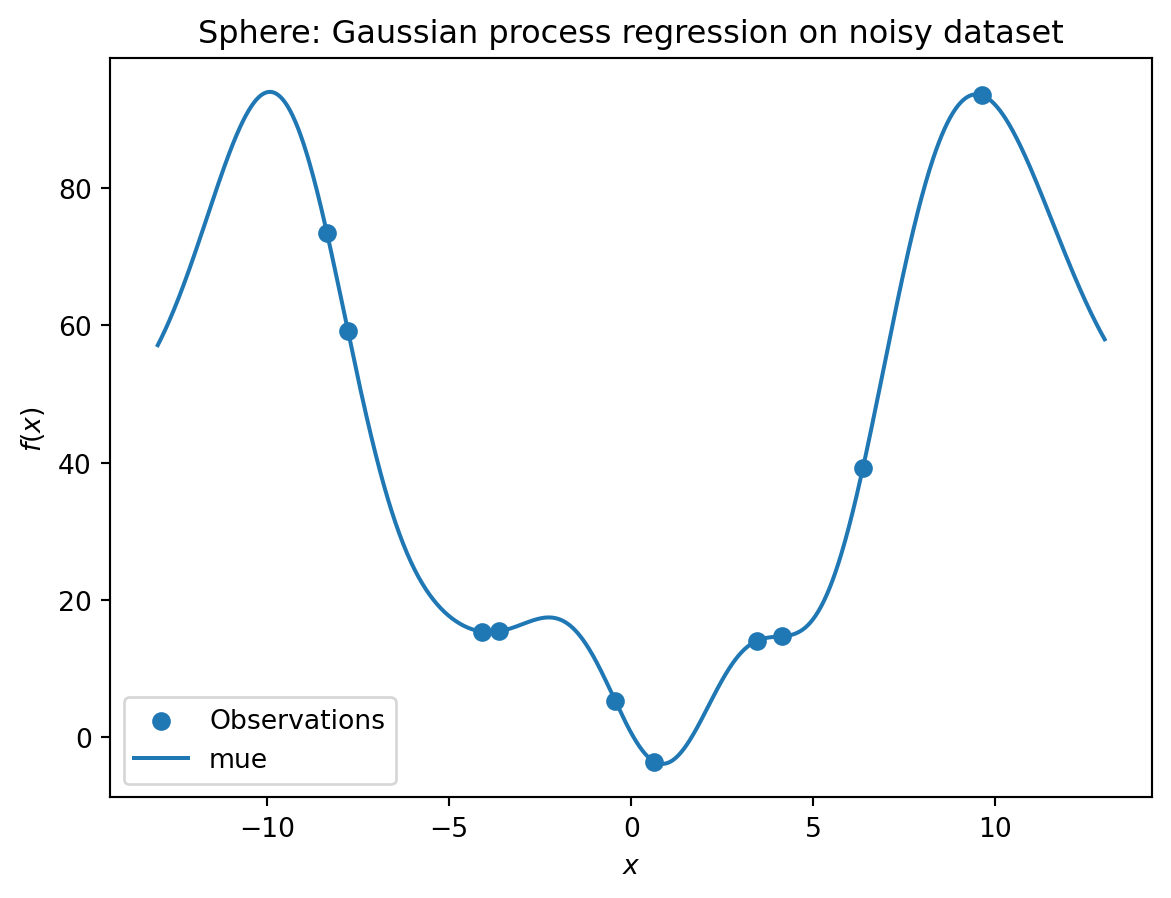

In [13]:
S = Kriging(name='kriging',
            n_theta=1,
            noise=False)
S.fit(X_train, y_train)

X_axis = np.linspace(start=-13, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S.predict(X_axis, return_val="all")

plt.scatter(X_train, y_train, label="Observations")
plt.plot(X_axis, mean_prediction, label="mue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Sphere: Gaussian process regression on noisy dataset")

* In comparison to the surrogate without nugget, we fit a surrogate with nugget to the data:


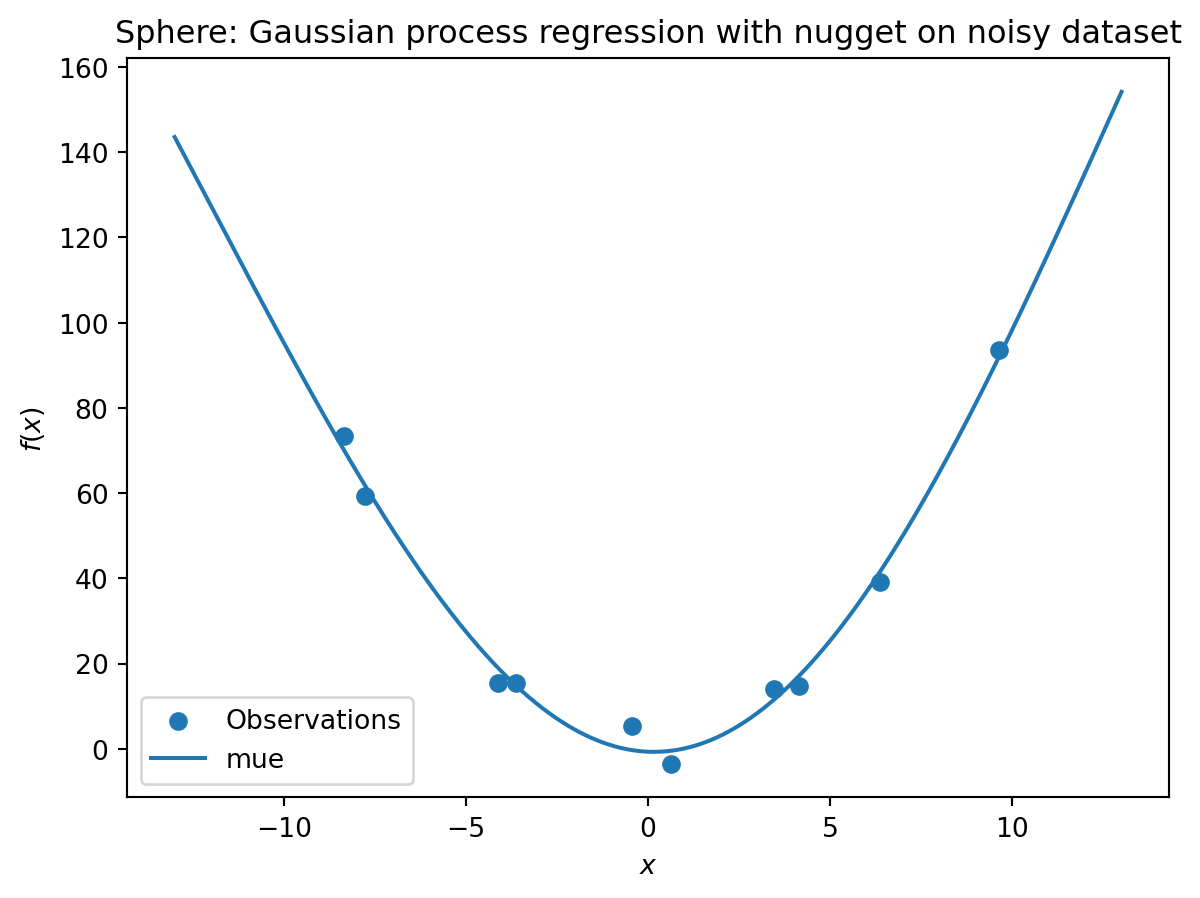

In [14]:
S_nug = Kriging(name='kriging',
            n_theta=1,
            noise=True)
S_nug.fit(X_train, y_train)
X_axis = np.linspace(start=-13, stop=13, num=1000).reshape(-1, 1)
mean_prediction, std_prediction, ei = S_nug.predict(X_axis, return_val="all")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X_axis, mean_prediction, label="mue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Sphere: Gaussian process regression with nugget on noisy dataset")

* The value of the nugget term can be extracted from the model as follows:


In [15]:
S.Lambda

In [16]:
S_nug.Lambda

0.0005592051705322895

* We see:
    * the first model `S` has no nugget, 
    * whereas the second model has a nugget value (`Lambda`) larger than zero.

## Exercises

### Noisy `fun_cubed`

* Analyse the effect of noise on the `fun_cubed` function with the following settings:


In [17]:
fun = analytical().fun_cubed
fun_control = fun_control_init(
    sigma=10)
lower = np.array([-10])
upper = np.array([10])

Seed set to 123


###  `fun_runge`

* Analyse the effect of noise on the `fun_runge` function with the following settings:


In [18]:
lower = np.array([-10])
upper = np.array([10])
fun = analytical().fun_runge
fun_control = fun_control_init(
    sigma=0.25)

Seed set to 123


###  `fun_forrester`

* Analyse the effect of noise on the `fun_forrester` function with the following settings: 


In [19]:
lower = np.array([0])
upper = np.array([1])
fun = analytical().fun_forrester
fun_control = fun_control_init(
    sigma=5)

Seed set to 123


###  `fun_xsin`

* Analyse the effect of noise on the `fun_xsin` function with the following settings: 


In [20]:
lower = np.array([-1.])
upper = np.array([1.])
fun = analytical().fun_xsin
fun_control = fun_control_init(    
    sigma=0.5)

Seed set to 123
